In [23]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

In [25]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [26]:
plt.style.use('seaborn-colorblind')

In [3]:
path = 'G:\sem6\data science by university of michigan/2018'
filenames = [file for file in os.listdir(path)]

In [4]:
filenames

['daily_42101_2018.csv',
 'daily_42401_2018.csv',
 'daily_42602_2018.csv',
 'daily_44201_2018.csv']

42101: carbon monoxide

42401: sulfur dioxide

42602: nitrogen dioxide

44201: ozone

In [14]:
namedict = dict(zip([42101,42401,42602,44201],['carbon monoxide','sulfur dioxide','nitrogen dioxide','ozone']))
namesdict = {'code':[42101,42401,42602,44201],'name':['carbon monoxide','sulfur dioxide','nitrogen dioxide','ozone']}
namesdf = pd.DataFrame(namesdict)

print(namesdf)
print(namedict[42101])

    code              name
0  42101   carbon monoxide
1  42401    sulfur dioxide
2  42602  nitrogen dioxide
3  44201             ozone
carbon monoxide


In [99]:

gasesdict = {}
for file in filenames:
    gasesdict[file.split('_')[1]] = pd.read_csv(path+'/'+file)
# print(gasesdict.keys)
gasesdict = dict((namedict[int(key)], value) for (key, value) in gasesdict.items())
gasesdict.keys()

dict_keys(['carbon monoxide', 'sulfur dioxide', 'nitrogen dioxide', 'ozone'])

In [66]:
print(gasesdict['carbon monoxide'].columns)
# np.random.randn().cumsum

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Arithmetic Mean',
       '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name',
       'CBSA Name', 'Date of Last Change'],
      dtype='object')


In [67]:
# print(gasesdict['carbon monoxide']['County Name'].unique(),'\n\n')
print(gasesdict['carbon monoxide']['State Name'].unique(),'\n\n')

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District Of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Puerto Rico'] 




In [69]:
for i in gasesdict.keys():
    gasesdict[i] = gasesdict[i][['Sample Duration','Date Local','Pollutant Standard', 'Arithmetic Mean','State Name']]
    tempfilter = (gasesdict[i]['State Name']== 'Michigan')
    gasesdict[i] = gasesdict[i][tempfilter]
# print(gasesdict['carbon monoxide'].shape)
# print(len(gasesdict['carbon monoxide']['Date Local'].unique()))
for i in gasesdict.keys():
    print(gasesdict[i].shape)
    print(gasesdict[i]['Sample Duration'].unique())
    print(gasesdict[i]['Pollutant Standard'].unique())
    print(len(gasesdict[i]['Date Local'].unique()))

(6190, 5)
['1 HOUR' '8-HR RUN AVG END HOUR']
['CO 1-hour 1971' 'CO 8-hour 1971']
365
(9561, 5)
['1 HOUR' '3-HR BLK AVG']
['SO2 1-hour 2010' 'SO2 3-hour 1971']
365
(3080, 5)
['1 HOUR']
['NO2 1-hour']
365
(8222, 5)
['8-HR RUN AVG BEGIN HOUR']
['Ozone 8-hour 2015']
365


(6190, 5)

['1 HOUR' '8-HR RUN AVG END HOUR']

['CO 1-hour 1971' 'CO 8-hour 1971']

365

(9561, 5)

['1 HOUR' '3-HR BLK AVG']

['SO2 1-hour 2010' 'SO2 3-hour 1971']

365

(3080, 5)

['1 HOUR']

['NO2 1-hour']

365

(8222, 5)

['8-HR RUN AVG BEGIN HOUR']

['Ozone 8-hour 2015']

365

In [83]:
filter_CO_sd = (gasesdict['carbon monoxide']['Sample Duration']=='1 HOUR')
# gasesdict['carbon monoxide'] = gasesdict['carbon monoxide'][filter_CO]
filter_CO_ps = (gasesdict['carbon monoxide']['Pollutant Standard']=='CO 1-hour 1971')
print(filter_CO_sd.sum(),filter_CO_ps.sum(),(filter_CO_sd==filter_CO_ps).sum())

3093 3093 6190


In [100]:
for i in gasesdict.keys():
    print('number of nan values in {} are {}'.format(i,gasesdict[i]['Arithmetic Mean'].isna().sum()))

number of nan values in carbon monoxide are 0
number of nan values in sulfur dioxide are 0
number of nan values in nitrogen dioxide are 0
number of nan values in ozone are 0


In [101]:
for i in gasesdict.keys():
    gasesdict[i] = gasesdict[i][['Date Local', 'Arithmetic Mean','State Name']]
    tempfilter = (gasesdict[i]['State Name']== 'Michigan')
    gasesdict[i] = gasesdict[i][tempfilter]
    gasesdict[i] = gasesdict[i].drop(columns = ['State Name'])
#     gasesdict[i]['Arithmetic Mean'] = gasesdict[i].groupby('Date Local')['Arithmetic Mean'].agg(np.mean)
    gasesdict[i] = gasesdict[i].groupby('Date Local').agg(lambda x:list(x))
    gasesdict[i].reset_index(inplace=True)

In [104]:
def meanarr(array):
    return sum(array)/len(array)
for i in gasesdict.keys():
    print(gasesdict[i])
    gasesdict[i]['Arithmetic Mean'] = gasesdict[i]['Arithmetic Mean'].apply(meanarr)
    print(gasesdict[i])

     Date Local                                    Arithmetic Mean
0    2018-01-01  [0.195652, 0.2, 0.817391, 0.8111109999999999, ...
1    2018-01-02  [0.204762, 0.2, 0.7956519999999999, 0.77916699...
2    2018-01-03  [0.25217399999999995, 0.24166700000000002, 0.8...
3    2018-01-04  [0.286957, 0.229167, 0.8, 0.8, 0.5478259999999...
4    2018-01-05  [0.469565, 0.504167, 0.818182, 0.8, 0.608696, ...
5    2018-01-06  [0.365217, 0.3875, 1.052174, 0.929167, 0.92173...
6    2018-01-07  [0.221739, 0.229167, 0.9478260000000001, 1.083...
7    2018-01-08  [0.21739099999999997, 0.2, 0.8913040000000001,...
8    2018-01-09  [0.5217390000000001, 0.4875, 0.940909, 0.95416...
9    2018-01-10  [0.313043, 0.333333, 0.9913040000000001, 0.995...
10   2018-01-11  [0.230435, 0.2375, 0.8913040000000001, 0.9, 0....
11   2018-01-12  [0.165217, 0.16666699999999998, 0.878261000000...
12   2018-01-13  [0.208696, 0.2, 0.9478260000000001, 0.88333299...
13   2018-01-14  [0.25217399999999995, 0.25416700000000003, 1.

In [191]:
final_df = pd.DataFrame({'date': gasesdict['carbon monoxide']['Date Local'],'carbon monoxide': gasesdict['carbon monoxide']['Arithmetic Mean'],
                        'sulfur dioxide':gasesdict['sulfur dioxide']['Arithmetic Mean'],'nitrogen dioxide':gasesdict['nitrogen dioxide']['Arithmetic Mean'],
                        'ozone':gasesdict['ozone']['Arithmetic Mean']})

In [262]:
# a = (list(final_df.columns))
# a.remove('date')
# a

In [263]:
# def returnmonth(string):
#     dictionary = {'01':'January',
#                  '02':'February',
#                  '03':'March',
#                  '04':'April',
#                  '05':'May',
#                  '06':'June',
#                  '07':'July',
#                  '08':'August',
#                  '09':'September',
#                  '10':'October',
#                  '11':'November',
#                  '12':'December'}
#     return [dictionary[string.split('-')[1]],string.split('-')[2]]
# final_df_roll = pd.DataFrame()
# final_df_roll['date']=final_df['date']
# final_df_roll['month']=final_df['date']

for i in a:
    final_df_roll[i] =  final_df[i].rolling(window=5).mean()
final_df_roll[0:4] = final_df[0:4]
# # final_df_roll.set_index('date')
# print(type(final_df_roll['date']))
# final_df_roll['date'] = final_df_roll['date'].apply(returnmonth)
# '2018-19-00'.split("-")

In [256]:
# final_df_roll.set_index('date',inplace=True)
final_df_roll.plot?

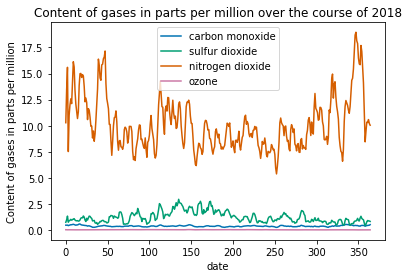

In [258]:
ax = final_df_roll.plot(title='Content of gases in parts per million over the course of 2018');
ax.set_xlabel("date");
ax.set_ylabel("Content of gases in parts per million");

https://aqs.epa.gov/aqsweb/airdata/download_files.html#Daily

